# NYC311 - Customer Service Requests Analysis

## DESCRIPTION

**Background of Problem Statement :**

NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.




In [1]:
#import library
import pandas as pd
import numpy as np
#import seaborn as sns
import geopandas
import matplotlib.pyplot as plt
import contextily as cx

In [2]:
path_to_data = geopandas.datasets.get_path("nybb")
gdf = geopandas.read_file(path_to_data)

#gdf['BoroName_Upper']=gdf['BoroName'].upper()
gdf["area"] = gdf.area
gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,area
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",1.623822e+09
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",3.045214e+09
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",1.937478e+09
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",6.364712e+08
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",1.186926e+09


In [3]:
gdf.dtypes

BoroCode         int64
BoroName        object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
area           float64
dtype: object

<AxesSubplot:>

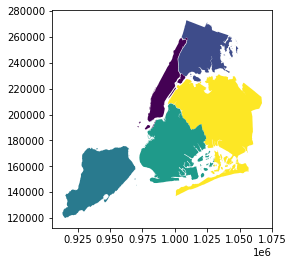

In [4]:
gdf.plot('area')

In [5]:
#convert BoroName elements to upper case and rename column
gdf['BoroName']=gdf['BoroName'].str.upper()
gdf_subset=gdf[['BoroName','geometry']]
gdf_subset_rename=gdf_subset.rename(columns={'BoroName':'Borough'})
gdf_subset_rename

,Borough,geometry
0,STATEN ISLAND,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,QUEENS,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,BROOKLYN,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,MANHATTAN,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,BRONX,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [6]:
#read csv file
df=pd.read_csv('s3://simplilearn-project/311_Service_Requests_from_2010_to_Present.csv')
df.head()

C:\Users\H255658\Anaconda3\envs\project\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [7]:
#determine the number of rows and columns
df.shape

(300698, 53)

In [8]:
df['count']=1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [9]:
#determine if there are missing values
df.isna().any()

Unique Key                        False
Created Date                      False
Closed Date                        True
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                         True
Location Type                      True
Incident Zip                       True
Incident Address                   True
Street Name                        True
Cross Street 1                     True
Cross Street 2                     True
Intersection Street 1              True
Intersection Street 2              True
Address Type                       True
City                               True
Landmark                           True
Facility Type                      True
Status                            False
Due Date                           True
Resolution Description            False
Resolution Action Updated Date     True
Community Board                   False
Borough                           False


In [10]:
df.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

Apply method chaining
https://towardsdatascience.com/the-unreasonable-effectiveness-of-method-chaining-in-pandas-15c2109e3c69

In [11]:
#drop columns with no data
#drop column Landmark ,School or Citywide Complaint, Vehicle Type, Taxi Company Borough, 
#Taxi Pick Up Location, Bridge Highway Name, Bridge Highway Direction
#Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name
drop_columns=["Landmark","School or Citywide Complaint","Vehicle Type","Taxi Company Borough"
             ,"Taxi Pick Up Location","Bridge Highway Name","Bridge Highway Direction",
             "Road Ramp","Bridge Highway Segment","Garage Lot Name","Ferry Direction",
             "Ferry Terminal Name"]
df_subset=df.drop(columns=drop_columns,axis=1)

In [12]:
#new shape of the dataset after dropping columns
df_subset.shape

(300698, 42)

In [13]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [14]:
#number of records in each category, user value_counts
df_subset["Complaint Type"].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [15]:
pivot1=(pd.pivot_table(df_subset,index='Complaint Type',values='count',aggfunc='sum')
        .sort_values(by='count',ascending=False)
        .to_markdown()
       )

print(pivot1)

| Complaint Type            |   count |
|:--------------------------|--------:|
| Blocked Driveway          |   77044 |
| Illegal Parking           |   75361 |
| Noise - Street/Sidewalk   |   48612 |
| Noise - Commercial        |   35577 |
| Derelict Vehicle          |   17718 |
| Noise - Vehicle           |   17083 |
| Animal Abuse              |    7778 |
| Traffic                   |    4498 |
| Homeless Encampment       |    4416 |
| Noise - Park              |    4042 |
| Vending                   |    3802 |
| Drinking                  |    1280 |
| Noise - House of Worship  |     931 |
| Posting Advertisement     |     650 |
| Urinating in Public       |     592 |
| Bike/Roller/Skate Chronic |     427 |
| Panhandling               |     307 |
| Disorderly Youth          |     286 |
| Illegal Fireworks         |     168 |
| Graffiti                  |     113 |
| Agency Issues             |       6 |
| Squeegee                  |       4 |
| Ferry Complaint           |       2 |


In [16]:
#Descriptor	Location Type
df_subset["Descriptor"].value_counts()

Loud Music/Party                  61430
No Access                         56976
Posted Parking Sign Violation     22440
Loud Talking                      21584
Partial Access                    20068
With License Plate                17718
Blocked Hydrant                   16081
Commercial Overnight Parking      12189
Car/Truck Music                   11273
Blocked Sidewalk                  11121
Double Parked Blocking Traffic     5731
Double Parked Blocking Vehicle     4211
Engine Idling                      4189
Banging/Pounding                   4165
Neglected                          3787
Car/Truck Horn                     3511
Congestion/Gridlock                2761
In Prohibited Area                 2025
Other (complaint details)          1969
Unlicensed                         1777
Overnight Commercial Storage       1757
Unauthorized Bus Layover           1367
Truck Route Violation              1014
In Public                           932
Tortured                            854


In [17]:
df_subset["Location Type"].value_counts()

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Park                               1
Terminal                           1
Ferry                              1
Name: Location Type, dtype: int64

In [18]:
pd.unique(df_subset["Agency"])

array(['NYPD'], dtype=object)

In [19]:
pd.unique(df_subset["Agency Name"])

array(['New York City Police Department', 'NYPD',
       'Internal Affairs Bureau'], dtype=object)

In [20]:
pd.unique(df_subset["Community Board"])

array(['12 MANHATTAN', '01 QUEENS', '07 BRONX', '10 BRONX', '04 QUEENS',
       '07 BROOKLYN', '03 BRONX', '09 QUEENS', '11 BROOKLYN', '03 QUEENS',
       '05 BRONX', '05 BROOKLYN', '05 QUEENS', '06 QUEENS', '12 QUEENS',
       '06 BROOKLYN', '18 BROOKLYN', '10 MANHATTAN', '04 BRONX',
       '12 BRONX', '09 MANHATTAN', '10 QUEENS', '07 MANHATTAN',
       '02 BROOKLYN', '03 BROOKLYN', '11 BRONX', '0 Unspecified',
       '08 BROOKLYN', '01 BROOKLYN', '03 STATEN ISLAND', '06 MANHATTAN',
       '03 MANHATTAN', '10 BROOKLYN', '11 MANHATTAN', '07 QUEENS',
       '11 QUEENS', '17 BROOKLYN', '13 QUEENS', '06 BRONX',
       '04 MANHATTAN', '14 BROOKLYN', '12 BROOKLYN', '08 MANHATTAN',
       '13 BROOKLYN', '15 BROOKLYN', '01 STATEN ISLAND', '09 BRONX',
       '02 STATEN ISLAND', '02 QUEENS', '16 BROOKLYN', '08 QUEENS',
       '09 BROOKLYN', '04 BROOKLYN', '14 QUEENS', '05 MANHATTAN',
       '08 BRONX', '02 BRONX', '02 MANHATTAN', '01 BRONX', '01 MANHATTAN',
       '83 QUEENS', '95 STATEN ISLAND

In [21]:
df_subset["Agency Name"].value_counts()

New York City Police Department    300690
Internal Affairs Bureau                 6
NYPD                                    2
Name: Agency Name, dtype: int64

In [22]:
#find NYPD in the column and replace with New York City Police department. Using the replace() method
#check if the replace method has worked
df_subset["Agency Name"]=df_subset["Agency Name"].replace({"NYPD":"New York City Police Department"})
df_subset["Agency Name"].value_counts()

New York City Police Department    300692
Internal Affairs Bureau                 6
Name: Agency Name, dtype: int64

In [23]:
df_subset["City"].value_counts()

BROOKLYN               98307
NEW YORK               65994
BRONX                  40702
STATEN ISLAND          12343
JAMAICA                 7296
ASTORIA                 6330
FLUSHING                5971
RIDGEWOOD               5163
CORONA                  4295
WOODSIDE                3544
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2734
ELMHURST                2673
WOODHAVEN               2464
MASPETH                 2462
LONG ISLAND CITY        2437
SOUTH OZONE PARK        2173
RICHMOND HILL           1904
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
JACKSON HEIGHTS         1689
FOREST HILLS            1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             931
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDENS   

In [24]:
df_subset['Borough'].value_counts()


BROOKLYN         98307
QUEENS           80641
MANHATTAN        66131
BRONX            40702
STATEN ISLAND    12343
Unspecified       2574
Name: Borough, dtype: int64

In [25]:
#filters rows to exclude records where Borough is not equal to Unspecified
df_subset_borough=(
    df_subset[df_subset['Borough']!='Unspecified']
    .groupby(['Borough'])['Borough'].count()
    .to_frame()
    .rename(columns={'Borough':'number_of_record'})
    )
df_subset_borough

,number_of_record
Borough,
BRONX,40702
BROOKLYN,98307
MANHATTAN,66131
QUEENS,80641
STATEN ISLAND,12343


In [26]:
#add polygon data to the dataframe df_subset_merge
df_subset_merge=pd.merge(df_subset_borough,gdf_subset_rename, on="Borough",how="left")
df_subset_merge

,Borough,number_of_record,geometry
0,BRONX,40702,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."
1,BROOKLYN,98307,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
2,MANHATTAN,66131,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
3,QUEENS,80641,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
4,STATEN ISLAND,12343,"MULTIPOLYGON (((970217.022 145643.332, 970227...."


In [27]:
df_subset_merge['Borough'].value_counts(), df_subset_merge.shape

(MANHATTAN        1
 STATEN ISLAND    1
 QUEENS           1
 BRONX            1
 BROOKLYN         1
 Name: Borough, dtype: int64,
 (5, 3))

In [28]:
gdf_burough=geopandas.GeoDataFrame(df_subset_merge, geometry='geometry')


In [29]:
gdf_burough

,Borough,number_of_record,geometry
0,BRONX,40702,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."
1,BROOKLYN,98307,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
2,MANHATTAN,66131,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
3,QUEENS,80641,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
4,STATEN ISLAND,12343,"MULTIPOLYGON (((970217.022 145643.332, 970227...."


In [30]:
gdf_burough['coords']=gdf_burough['geometry'].apply(lambda x:x.representative_point().coords[:])
gdf_burough['coords'] = [coords[0] for coords in gdf_burough['coords']]
gdf_burough

,Borough,number_of_record,geometry,coords
0,BRONX,40702,"MULTIPOLYGON (((1012821.806 229228.265, 101278...","(1021230.8252189507, 251186.33629250404)"
1,BROOKLYN,98307,"MULTIPOLYGON (((1021176.479 151374.797, 102100...","(998506.9400731353, 177674.6976928711)"
2,MANHATTAN,66131,"MULTIPOLYGON (((981219.056 188655.316, 980940....","(995258.5039826182, 226631.0523071289)"
3,QUEENS,80641,"MULTIPOLYGON (((1029606.077 156073.814, 102957...","(1033983.965822806, 196127.3905029297)"
4,STATEN ISLAND,12343,"MULTIPOLYGON (((970217.022 145643.332, 970227....","(943802.6851148934, 147890.05410766602)"


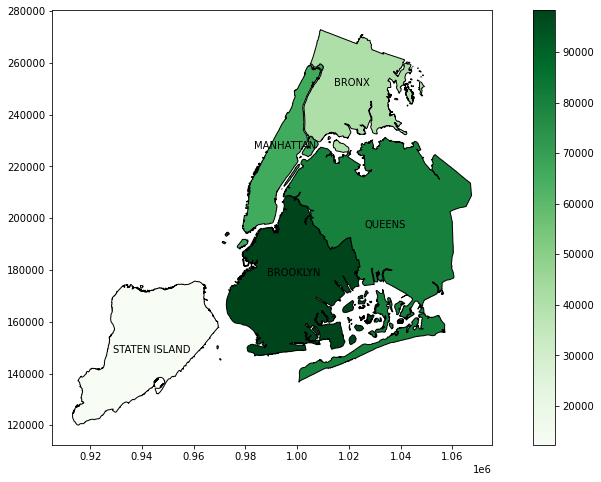

In [31]:
gdf_burough.plot(column='number_of_record',cmap='Greens',legend=True,figsize = (15,8),edgecolor='k')
for idx, row in gdf_burough.iterrows():
    plt.annotate(text=row['Borough'], xy=row['coords'],
                 horizontalalignment='center')
plt.savefig('figures/buroughs_complaint_count.png',bbox_inches="tight")

In [32]:
pivot2=(pd.pivot_table(df_subset,index='Borough',values='count',aggfunc='sum')
        .sort_values(by='count',ascending=False)
        .to_markdown()
       )

print(pivot2)

| Borough       |   count |
|:--------------|--------:|
| BROOKLYN      |   98307 |
| QUEENS        |   80641 |
| MANHATTAN     |   66131 |
| BRONX         |   40702 |
| STATEN ISLAND |   12343 |
| Unspecified   |    2574 |


In [33]:
df_subset["Status"].value_counts(),df_subset["Facility Type"].value_counts()

(Closed      298471
 Open          1439
 Assigned       786
 Draft            2
 Name: Status, dtype: int64,
 Precinct    298527
 Name: Facility Type, dtype: int64)

In [34]:
pivot3=(
    pd.pivot_table(df_subset,index=['Location Type','Complaint Type'],values='count',aggfunc='sum')
    .sort_values(by='count',ascending=False)
    .head(20)
)
pivot3

count
Location Type              Complaint Type                 
Street/Sidewalk            Blocked Driveway          77007
                           Illegal Parking           75326
                           Noise - Street/Sidewalk   48601
Store/Commercial           Noise - Commercial        18598
Street/Sidewalk            Derelict Vehicle          17614
                           Noise - Vehicle           17080
Club/Bar/Restaurant        Noise - Commercial        16973
Residential Building/House Animal Abuse               5085
Street/Sidewalk            Traffic                    4278
Park/Playground            Noise - Park               4041
Street/Sidewalk            Vending                    3061
                           Homeless Encampment        2541
                           Animal Abuse               1531
Residential Building/House Homeless Encampment         983
House of Worship           Noise - House of Worship    929
Street/Sidewalk            Posting Advertisement       582
Store/Commercial           Animal Abuse                522
                           Homeless Encampment         512
Street/Sidewalk            Drinking                    434
Store/Commercial           Vending                     432

In [35]:
df_subset['Resolution Description'].value_counts()

The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.                                                                                                                                                                                                                                                                                                                                                                               90490
The Police Department responded to the complaint and took action to fix the condition.                                                                                                                                                                                                                                                                                                                                                                                                                      

In [36]:
df_subset[['Created Date','Due Date','Resolution Action Updated Date','Closed Date']].head()

,Created Date,Due Date,Resolution Action Updated Date,Closed Date
0,12/31/2015 11:59:45 PM,01-01-16 7:59,01-01-16 0:55,01-01-16 0:55
1,12/31/2015 11:59:44 PM,01-01-16 7:59,01-01-16 1:26,01-01-16 1:26
2,12/31/2015 11:59:29 PM,01-01-16 7:59,01-01-16 4:51,01-01-16 4:51
3,12/31/2015 11:57:46 PM,01-01-16 7:57,01-01-16 7:43,01-01-16 7:43
4,12/31/2015 11:56:58 PM,01-01-16 7:56,01-01-16 3:24,01-01-16 3:24


In [37]:
df_subset['Resolution Description'].head()

0    The Police Department responded and upon arriv...
1    The Police Department responded to the complai...
2    The Police Department responded and upon arriv...
3    The Police Department responded to the complai...
4    The Police Department responded and upon arriv...
Name: Resolution Description, dtype: object

In [15]:
#change data types of Created Date, Due Date, Resolution Action Updated Date, Closed Date
df_subset["Created Date"]=pd.to_datetime(df_subset["Created Date"])
df_subset["Closed Date"]=pd.to_datetime(df_subset["Closed Date"])
df_subset['Due Date']=pd.to_datetime(df_subset['Due Date'])
df_subset['Resolution Action Updated Date']=pd.to_datetime(df_subset['Resolution Action Updated Date'])

In [16]:
df_subset.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Facility Type                             object
Status                                    object
Due Date                          datetime64[ns]
Resolution Descripti

In [40]:
#check if Resolution Action Updated Date & Closed Date columns are the same
df_subset['equal_resolution_closed_date']=(np.where(df_subset['Closed Date']==df_subset['Resolution Action Updated Date'],True,False))


In [41]:
df_subset['equal_resolution_closed_date'].value_counts()

True     275075
False     25623
Name: equal_resolution_closed_date, dtype: int64

In [42]:
df_subset["Created Date"].min(), df_subset["Created Date"].max()

(Timestamp('2015-03-29 00:33:01'), Timestamp('2015-12-31 23:59:45'))

In [43]:
time_delta=df_subset["Created Date"].max() - df_subset["Created Date"].min()
print(time_delta)

277 days 23:26:44


In [17]:
#Add column Request Closing Time
df_subset['Request_Closing_Time']=df_subset['Closed Date']-df_subset['Created Date']
df_subset['Request_Closing_Time (mins)']=df_subset['Request_Closing_Time']/np.timedelta64(1,'m')
df_subset['Request_Closing_Time (mins)']

0          55.250000
1          86.266667
2         291.516667
3         465.233333
4         207.033333
             ...    
300693           NaN
300694    120.516667
300695    187.283333
300696    245.550000
300697    248.816667
Name: Request_Closing_Time (mins), Length: 300698, dtype: float64

In [45]:
#parse month name from created date. Issue: the month name is parsed as a string and not month
df_subset['created_date_month']=df_subset['Created Date'].dt.month_name()#to_period('M')
df_subset['created_date_month']

0         December
1         December
2         December
3         December
4         December
            ...   
300693       March
300694       March
300695       March
300696       March
300697       March
Name: created_date_month, Length: 300698, dtype: object

In [46]:
df_subset['test']=pd.to_datetime(df_subset['Created Date'],format='%d-%b')
df_subset['test']

0        2015-12-31 23:59:45
1        2015-12-31 23:59:44
2        2015-12-31 23:59:29
3        2015-12-31 23:57:46
4        2015-12-31 23:56:58
                 ...        
300693   2015-03-29 00:33:41
300694   2015-03-29 00:33:28
300695   2015-03-29 00:33:03
300696   2015-03-29 00:33:02
300697   2015-03-29 00:33:01
Name: test, Length: 300698, dtype: datetime64[ns]

In [47]:
# parse month index from created date
df_subset['created_date_monthindex']=df_subset['Created Date'].dt.month
df_subset['created_date_monthindex']

0         12
1         12
2         12
3         12
4         12
          ..
300693     3
300694     3
300695     3
300696     3
300697     3
Name: created_date_monthindex, Length: 300698, dtype: int64

In [49]:
#sort value by month index
df_subset_sort=df_subset.sort_values(by='created_date_monthindex')
df_subset_sort.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Latitude,Longitude,Location,count,equal_resolution_closed_date,Request_Closing_Time,Request_Closing_Time (mins),created_date_month,test,created_date_monthindex
300697,30281825,2015-03-29 00:33:01,2015-03-29 04:41:50,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,251 WEST 48 STREET,...,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)",1,True,0 days 04:08:49,248.816667,March,2015-03-29 00:33:01,3
299053,30297425,2015-03-31 01:36:17,2015-03-31 02:56:44,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10029.0,118 EAST 116 STREET,...,40.798949,-73.942417,"(40.7989493438091, -73.94241686500288)",1,True,0 days 01:20:27,80.450000,March,2015-03-31 01:36:17,3
299052,30296278,2015-03-31 01:40:09,2015-03-31 02:02:28,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,10012.0,219 MULBERRY STREET,...,40.722308,-73.996140,"(40.72230847272815, -73.99613980463909)",1,False,0 days 00:22:19,22.316667,March,2015-03-31 01:40:09,3
299051,30294322,2015-03-31 01:42:30,2015-03-31 02:30:48,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11385.0,60-57 CATALPA AVENUE,...,40.703565,-73.897138,"(40.70356526007681, -73.89713846415955)",1,True,0 days 00:48:18,48.300000,March,2015-03-31 01:42:30,3
299050,30297422,2015-03-31 01:43:35,2015-03-31 02:32:53,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11385.0,NaN,...,40.705197,-73.898535,"(40.70519689129971, -73.8985353599385)",1,True,0 days 00:49:18,49.300000,March,2015-03-31 01:43:35,3


In [65]:
sort_month=['March','April','May','June','July','August','September','October','November','December']
pivot4=(
    pd.pivot_table(df_subset,
                   index='created_date_month',
                   columns=['Borough'],
                   values='count',
                   aggfunc='sum')
    .reindex(sort_month,axis=0)
    #.sort_values(by='created_date_monthindex')
)
pivot4

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
created_date_month,,,,,,
March,297,832,499,720,105,18
April,3212,8771,6621,7453,1050,198
May,5126,11623,8851,9156,1263,418
June,4848,11887,7497,9464,1385,234
July,5556,10693,7568,9218,1335,518
August,5439,10847,7768,9121,1523,258
September,4798,12039,7631,9203,1457,299
October,3963,10641,7227,9139,1408,227
November,3682,10550,6352,8554,1436,199


In [66]:
pivot4.columns

Index(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND',
       'Unspecified'],
      dtype='object', name='Borough')

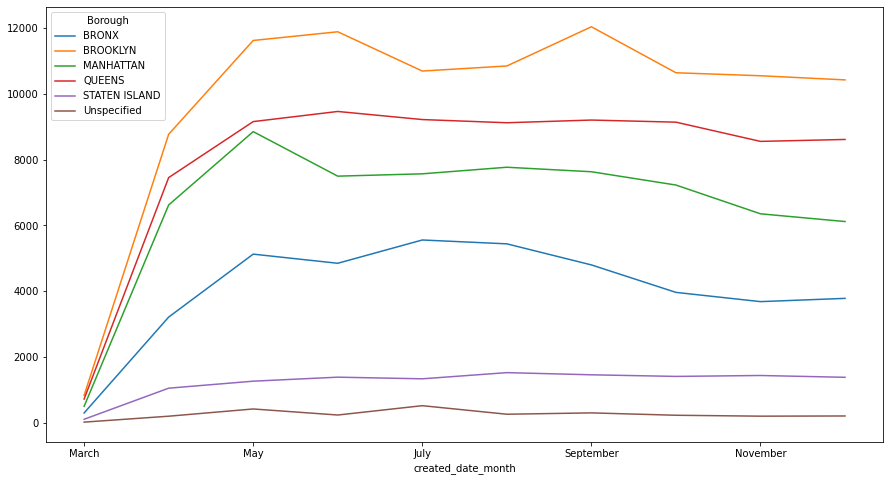

In [70]:
pivot4.plot(figsize = (15,8))
plt.savefig('figures/buroughs_monthlytrrend_complaint.png',bbox_inches="tight")

In [ ]:
# Average Response Time for each complaint type
df_subset.groupby('Complaint Type')['Request_Closing_Time'].agg(lambda x: x.mean()).sort_values(ascending=False)

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
df_subset.groupby(['Complaint Type','Location Type'])['Request_Closing_Time'].agg(lambda x: x.mean())

In [72]:
pd.unique(df_subset['Status'])

array(['Closed', 'Open', 'Assigned', 'Draft'], dtype=object)

In [73]:
df_subset.groupby(['Status','Complaint Type'])['Status'].count()

Status    Complaint Type           
Assigned  Animal Abuse                     4
          Bike/Roller/Skate Chronic        1
          Blocked Driveway                98
          Derelict Vehicle                27
          Homeless Encampment              4
          Illegal Parking                257
          Noise - Commercial             156
          Noise - Park                    11
          Noise - Street/Sidewalk        201
          Noise - Vehicle                 20
          Panhandling                      1
          Posting Advertisement            1
          Traffic                          2
          Vending                          3
Closed    Agency Issues                    6
          Animal Abuse                  7766
          Animal in a Park                 1
          Bike/Roller/Skate Chronic      424
          Blocked Driveway             76793
          Derelict Vehicle             17585
          Disorderly Youth               286
          Drinking 

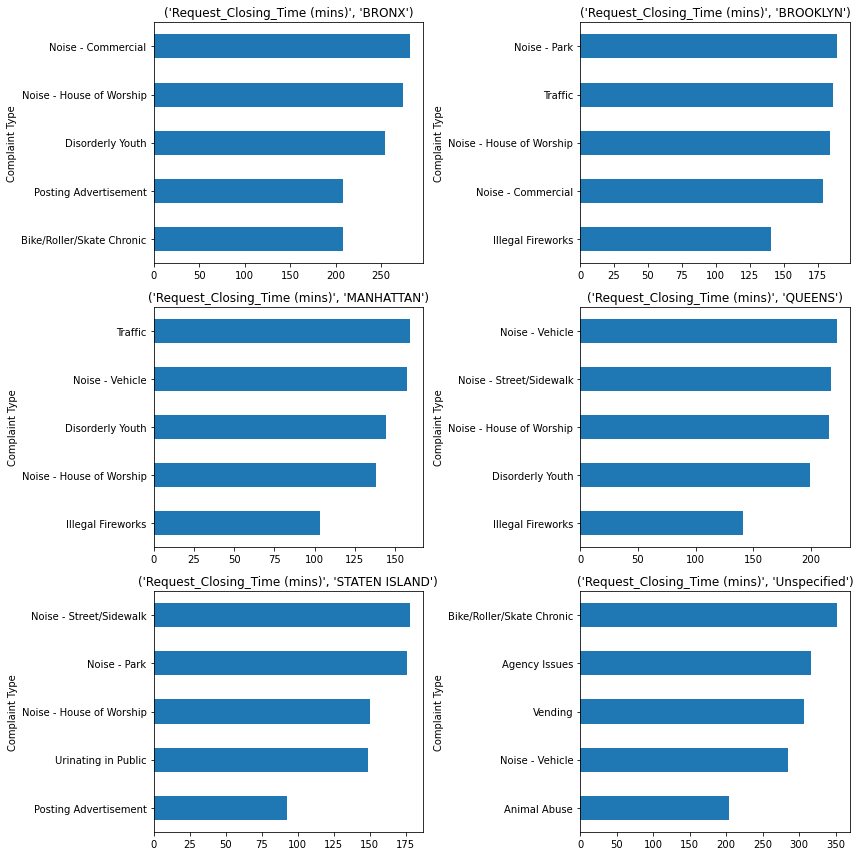

In [18]:
Complaint_Type_Borough = df_subset.groupby(['Complaint Type','Borough'])[['Request_Closing_Time (mins)']].mean().unstack() #this line of code is converting a series data to a dataframe...because of the unstack method. We were getting a series, by applying the unstack method it convets to a dataframe. We need a dataframe to make plotting easy
 
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))
 
for i, (label,col) in enumerate(Complaint_Type_Borough.iteritems()): # this loop is iterating through every row in the dataframe. Dataframe is just a dictionary with key value pair.. Enumerate exposes the loop index 
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:5]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()
plt.savefig('figures/request_closing_time_burough.png',bbox_inches="tight")

In [ ]:
df_subset.groupby(['Complaint Type','Borough'])[['Request_Closing_Time (mins)']].mean().unstack()

In [ ]:
pivot